In [114]:
# Import Necessary Libraries
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import multivariate_normal, bernoulli, beta, norm
from scipy.stats import ks_2samp
from scipy.special import expit as logistic_sigmoid
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import brier_score_loss
from sklearn.model_selection import cross_val_score
from sklearn.metrics import balanced_accuracy_score, brier_score_loss, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import KFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(r'c:\Users\Gur Levy\Desktop\PORTFOLIO\DE_PORTFOLIO\combined_data.csv')

In [115]:
df = df[df['Player'] == 'K. De Bruyne']
df = df[df['Competition'] == 'England. Premier League']
df


,Player,Match,Competition,Date,Position,Minutes played,Total actions,Successful actions,Goals,Assists,...,xCG,Shots against,Saves / with reflexes,Unnamed: 65,Exits,Passes to GK,Accurate passes to GK,Goal kicks,Short goal kicks,Long goal kicks
65685,K. De Bruyne,Manchester City - Brentford 1:2,England. Premier League,2022-11-12,"RAMF, RCMF3",106,101,54,0,0,...,0.0,0,0,0,0,0,0,0,0,0
65686,K. De Bruyne,Manchester City - Fulham 2:1,England. Premier League,2022-11-05,"RCMF3, RW",101,85,54,0,0,...,0.0,0,0,0,0,0,0,0,0,0
65688,K. De Bruyne,Leicester City - Manchester City 0:1,England. Premier League,2022-10-29,RCMF3,96,96,64,1,0,...,0.0,0,0,0,0,1,1,0,0,0
65689,K. De Bruyne,Manchester City - Brighton 3:1,England. Premier League,2022-10-22,RCMF3,99,67,34,1,0,...,0.0,0,0,0,0,1,1,0,0,0
65690,K. De Bruyne,Liverpool - Manchester City 1:0,England. Premier League,2022-10-16,AMF,101,67,37,0,0,...,0.0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66068,K. De Bruyne,Manchester City - AFC Bournemouth 5:1,England. Premier League,2015-10-17,LAMF,65,66,41,0,1,...,0.0,0,0,0,0,0,0,0,0,0
66071,K. De Bruyne,Manchester City - Newcastle United 6:1,England. Premier League,2015-10-03,"AMF, LAMF, RAMF",97,104,67,1,2,...,0.0,0,0,0,0,0,0,0,0,0
66073,K. De Bruyne,Tottenham Hotspur - Manchester City 4:1,England. Premier League,2015-09-26,"AMF, LAMF, RAMF",95,77,43,1,0,...,0.0,0,0,0,0,0,0,0,0,0
66075,K. De Bruyne,Manchester City - West Ham United 1:2,England. Premier League,2015-09-19,"AMF, LAMF, LWB",99,104,77,1,0,...,0.0,0,0,0,0,0,0,0,0,0


In [116]:
df['Total_Accurate_Passes'] = df['Accurate passes'] + df['Accurate back passes'] + df['Accurate crosses'] + df['Accurate forward passes'] + df['Accurate long passes'] + df['Accurate passes to GK'] + df['Accurate passes to final third'] + df['Accurate passes to penalty area'] + df['Accurate through passes']
df['Total_Accurate_Passes']

65685     88
65686     73
65688     88
65689     37
65690     61
        ... 
66068     70
66071    103
66073     60
66075    101
66077     71
Name: Total_Accurate_Passes, Length: 221, dtype: int64

In [117]:
from sklearn.model_selection import train_test_split

# Define the feature matrix X and target vector y
X = df[['Accurate passes', 'Accurate back passes', 'Accurate crosses', 
                   'Accurate forward passes', 'Accurate long passes', 
                   'Accurate passes to GK', 'Accurate passes to final third', 
                   'Accurate passes to penalty area', 'Accurate through passes']]
y = df['Total_Accurate_Passes']

# Split the data into training and remaining dataset with 70% training and 30% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the remaining dataset into validation and test sets (50% each of remaining)
X_validation, X_test, y_validation, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)

print("Training set size:", X_train.shape)
print("Validation set size:", X_validation.shape)
print("Test set size:", X_test.shape)


Training set size: (154, 9)
Validation set size: (33, 9)
Test set size: (34, 9)


In [118]:
from statsmodels.tools import add_constant
# Add a constant to the training set
X_train_const = add_constant(X_train)

# Add a constant to the validation set
X_validation_const = add_constant(X_validation)

X_test_const = add_constant(X_test)

print("Training set size:", X_train_const.shape)
print("Validation set size:", X_validation_const.shape)
print("Test set size:", X_test_const.shape)

Training set size: (154, 10)
Validation set size: (33, 10)
Test set size: (34, 10)


In [119]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error

def fit_predict_evaluate(train_X, train_y, valid_X, valid_y, credibility_pct=95, n_sims = 10000):
    
    # Fit the model
    model = sm.OLS(train_y, train_X).fit()
    
    # Step 2: Predict new values
    new_predictions = model.predict(valid_X)
    
    # Step 3: Calculate standard errors of the predictions
    cov_matrix = model.cov_params()
    design_matrix = valid_X
    variances = np.diag(np.dot(np.dot(design_matrix, cov_matrix), design_matrix.T))
    std_errors_predictions = np.sqrt(variances)
    
    # Generate posterior samples
    new_predictions_array = np.array(new_predictions)[:, None]  
    std_errors_predictions_array = np.array(std_errors_predictions)[:, None]  
    
    predicted_samples = np.random.normal(loc=new_predictions_array,
                                         scale=std_errors_predictions_array,
                                         size=(new_predictions.shape[0], n_sims))
    
    # Calculate estimates summaries
    monte_carlo_medians = np.median(predicted_samples, axis=1)
    prediction_intervals = np.percentile(predicted_samples, [(100-credibility_pct)/2, credibility_pct+(100-credibility_pct)/2], axis=1)
    
    # Calculate metrics
    bias = np.mean(monte_carlo_medians - valid_y)
    rmse = np.sqrt(mean_squared_error(valid_y, monte_carlo_medians))
    correlation = np.corrcoef(valid_y, monte_carlo_medians)[0, 1]
    coverage = np.mean((valid_y >=  prediction_intervals[0,:]) & (valid_y <=  prediction_intervals[1,:]))
    
    # Return results as a dictionary
    results = {
        'bias': bias,
        'rmse': rmse,
        'correlation': correlation,
        'coverage': coverage,
        'predictions': new_predictions,
        'prediction_intervals': prediction_intervals
    }

    return results

In [120]:
# calculate scores for each model
intercept_only = fit_predict_evaluate(X_train_const[['const']], y_train, X_validation_const[['const']], y_validation, credibility_pct=95)
subset_features = fit_predict_evaluate(X_train_const[['const', 'Accurate passes', 'Accurate back passes', 'Accurate crosses']], y_train, X_validation_const[['const', 'Accurate passes', 'Accurate back passes', 'Accurate crosses']], y_validation, credibility_pct=95)
all_features = fit_predict_evaluate(X_train_const, y_train, X_validation_const, y_validation, credibility_pct=95)


In [121]:
# generate a table with the scores 
scores = [
    {'name': 'Intercept Only', **intercept_only},
    {'name': 'Subset', **subset_features},
    {'name': 'All', **all_features},
]

# Convert the list of dictionaries to a DataFrame
scores_df_automated = pd.DataFrame(scores)

# Rename the 'name' column to 'Score Type' for clarity
scores_df_automated.rename(columns={'name': 'Score Type'}, inplace=True)

scores_df_automated

,Score Type,bias,rmse,correlation,coverage,predictions,prediction_intervals
0,Intercept Only,-4.789039e+00,2.992536e+01,0.018337,0.181818,65975 75.116883 65994 75.116883 66075 ...,"[[69.89306334911811, 69.95864651539559, 69.967..."
1,Subset,-1.016337e+00,6.555443e+00,0.979154,0.151515,65975 102.939562 65994 137.126606 66075 ...,"[[101.47331058759745, 134.75490266015098, 102...."
2,All,3.886453e-14,4.341928e-14,1.000000,0.242424,65975 111.0 65994 140.0 66075 101.0 6...,"[[111.00000000000003, 140.00000000000003, 101...."


In [122]:
model_saturated = sm.OLS(y_train, X_train_const).fit()
# Step 2: Predict new values on validation set
new_predictions = model_saturated.predict(X_validation_const)

mse = mean_squared_error(y_validation, new_predictions)
std_error = np.sqrt(mse)

confidence = 0.95
z_score = stats.norm.ppf((1 + confidence) / 2)
prediction_intervals = [(pred - z_score * std_error, pred + z_score * std_error) for pred in new_predictions]

# If needed, convert prediction intervals to a numpy array for further analysis
prediction_intervals_array = np.array(prediction_intervals)

print("New Predictions:", new_predictions.head())
print("Prediction Intervals (first 5):", prediction_intervals_array[:5])

New Predictions: 65975    111.0
65994    140.0
66075    101.0
65713    101.0
65851     55.0
dtype: float64
Prediction Intervals (first 5): [[111. 111.]
 [140. 140.]
 [101. 101.]
 [101. 101.]
 [ 55.  55.]]


In [123]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_validation, new_predictions))
print(f"RMSE: {rmse}")

# Calculate Bias
bias = (new_predictions - y_validation).mean()
print(f"Bias: {bias}")


# Calculate Correlation
correlation = np.corrcoef(y_validation, new_predictions)[0, 1]
print(f"Pearson's correlation: {correlation}")


metrics = {'Bias': bias,
           'RMSE': rmse,
           'Correlation': correlation
           }

RMSE: 4.341928297683788e-14
Bias: 3.8864534486272147e-14
Pearson's correlation: 0.9999999999999998


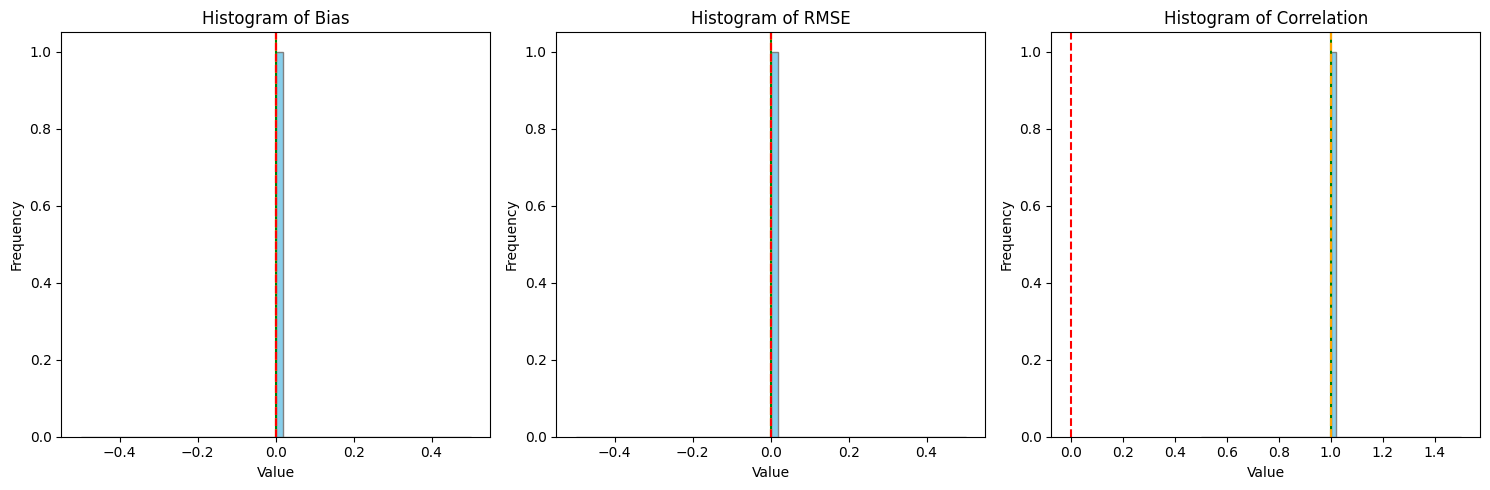

In [124]:
# plot the distributions of each error metric
import matplotlib.pyplot as plt

# Define metric names
metric_names = ['Bias', 'RMSE', 'Correlation']

# Define number of metrics to plot
n_metrics = len(metric_names)

# Adjust rows and columns calculation to avoid empty subplots
n_plots = n_metrics  # Total number of plots needed
n_rows = 1
n_cols = (n_plots + n_rows - 1) // n_rows  # Calculate columns needed, ensuring we have enough space

# Adjust the figsize if necessary
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5), squeeze=False)  # Make sure axes is always a 2D array

# Flatten axes array for easier iteration
axes_flat = axes.flatten()

for i, name in enumerate(metric_names):
    data = metrics[name]  # Access data directly from dictionary
    median_val = np.median(data)
    confidence_interval = np.percentile(data, [2.5, 97.5])
    
    ax = axes_flat[i]
    ax.hist(data, bins=50, color='skyblue', edgecolor='gray')
    ax.axvline(x=median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    ax.axvline(x=confidence_interval[0], color='orange', linestyle='--', label=f'95% CI: [{confidence_interval[0]:.2f}, {confidence_interval[1]:.2f}]')
    ax.axvline(x=confidence_interval[1], color='orange', linestyle='--')
    ax.axvline(x=0, color='red', linestyle='--', label='Zero line')  # Highlight 0 with a line
    ax.set_title(f'Histogram of {name}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    
    # Ensure plot encompasses 0 by adjusting xlim if necessary
    xlims = ax.get_xlim()
    ax.set_xlim(min(xlims[0], 0), max(xlims[1], 0))

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes_flat[j])

# Adjust layout for better spacing and display the plot
plt.tight_layout()
plt.show()